In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets,linear_model

In [3]:
data=pd.read_csv('/home/fay/PycharmProjects/handson-ml/mlpractice/data/CCPP/Folds5x2_pp.csv')

In [4]:
X = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [7]:
print(ridge.intercept_) #截距
print(ridge.coef_)      #系数

[447.05552892]
[[-1.97373209 -0.2323016   0.06935852 -0.15806479]]


In [8]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas=[0.01, 0.1, 0.5, 1, 3, 5, 7, 10, 20, 100])
ridgecv.fit(X_train, y_train)
ridgecv.alpha_  

7.0

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [10]:
# X is a 10x10 matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
# y is a 10 x 1 vector
y = np.ones(10)

In [11]:
n_alphas = 200
# alphas count is 200, 都在10的-10次方和10的-2次方之间
alphas = np.logspace(-10, -2, n_alphas)

In [12]:
clf = linear_model.Ridge(fit_intercept=False)
coefs = []
# 循环200次
for a in alphas:
    #设置本次循环的超参数
    clf.set_params(alpha=a)
    #针对每个alpha做ridge回归
    clf.fit(X, y)
    # 把每一个超参数alpha对应的theta存下来
    coefs.append(clf.coef_)

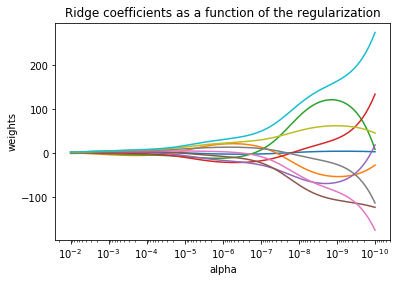

In [13]:
ax = plt.gca() #当前的图表和子图可以使用plt.gcf()和plt.gca()获得，分别表示Get Current Figure和Get Current Axes

ax.plot(alphas, coefs)
#将alpha的值取对数便于画图
ax.set_xscale('log')
#翻转x轴的大小方向，让alpha从大到小显示
ax.set_xlim(ax.get_xlim()[::-1]) 
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()